# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Chelmsford, Essex, United Kingdom**, or **United Kingdom** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Chelmsford, Essex, United Kingdom** to Ann Arbor, USA. In that case at least one source file must be about **Chelmsford, Essex, United Kingdom**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Chelmsford, Essex, United Kingdom** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# The UK and USA - A "Special Relationship"?

It is often claimed that the UK and USA have a "special relationship".  Here we will compare whether the fortunes of the UK and USA are indeed correlated.

To keep things simple the GDP of each country from 1950 until 2015 will be used.

UK economic data is obtained from: https://www.ons.gov.uk/economy/grossdomesticproductgdp/timeseries/abmi/qna

US economic data is obtained from: https://www.bea.gov/national/index.htm#gdp

Each countries data will be returned as:
  - Year
  - GDP, in billions
  - Relative change in GDP

## Prepare UK Data

The UK data needs minimal preparation:
 - Remove data that is specific to quarters
 - Convert GDP in millions to billions
 - Calculate the relative GDP change per year

In [2]:
def prepareUKData():
    ukDataFile = "./UKGDP.csv"
    
    ukDF = pd.read_csv(ukDataFile,header=0,names=["Year","GDPMil"],skiprows=7)
    
    # Remove the entries for quarters
    ukDF = ukDF[list(map(lambda x: True if len(x) < 5 else False, ukDF["Year"]))]
    ukDF["GDP"] = ukDF["GDPMil"]/1000
    ukDF["Change"] = ukDF["GDP"].diff()
    ukDF["Relative"] = np.round(ukDF["Change"]/ukDF["GDP"]*100,2)
    ukDF["GDP"] = np.round(ukDF["GDP"],0)

    # Keep it in range 1950-2015 and keep only Year, GDP and Relative columns
    ukDF = ukDF[(ukDF["Year"] >= "1950") & (ukDF["Year"] < "2015")][["Year","GDP","Relative"]]
    ukDF = ukDF.set_index("Year")

    return ukDF

uk = prepareUKData().head()
print(uk.head())
print(uk.tail())

        GDP  Relative
Year                 
1950  360.0      3.21
1951  373.0      3.61
1952  379.0      1.57
1953  400.0      5.24
1954  417.0      4.12
        GDP  Relative
Year                 
1950  360.0      3.21
1951  373.0      3.61
1952  379.0      1.57
1953  400.0      5.24
1954  417.0      4.12


## Prepare US Data

The US data needs minimal preparation:
 - Only extract Year and GDP data
 - Calculate the relative GDP change per year
 - Filter to desired year range

In [3]:
def prepareUSData():
    usDataFile = "./USGDP.xls"
    
    usDF = pd.read_excel(usDataFile, sheetname="Sheet1", skiprows=7, parse_cols="A,C", header=0, names=["Year","GDP"])
    usDF = usDF.dropna()
    usDF["Year"] = usDF["Year"].map(lambda x: "{0:.0f}".format(x))
    usDF["Change"] = usDF["GDP"].diff()
    usDF["Relative"] = np.round(usDF['Change']/usDF["GDP"]*100,2)
    usDF["GDP"] = np.round(usDF["GDP"],0)
    
    # Keep it in range 1950-2015 and keep only Year, GDP and Relative columns
    usDF = usDF[(usDF["Year"] >= "1950") & (usDF["Year"] < "2015")][["Year","GDP","Relative"]]
    usDF = usDF.set_index("Year")
    
    return usDF

In [4]:
us = prepareUSData()
print(us.head())
print(us.tail())

         GDP  Relative
Year                  
1950  2184.0      8.02
1951  2360.0      7.46
1952  2456.0      3.91
1953  2571.0      4.48
1954  2557.0     -0.57
          GDP  Relative
Year                   
2010  14784.0      2.47
2011  15021.0      1.58
2012  15355.0      2.18
2013  15612.0      1.65
2014  15982.0      2.32


## Merge the Datasets

In [5]:
def combinedUKUSData():
    ukDF = prepareUKData()
    usDF = prepareUSData()
    
    combinedDF = pd.merge(ukDF, usDF, how="inner", left_index=True, right_index=True )
    combinedDF.rename(columns={"GDP_x": "UKGDP", "Relative_x": "UKRelative",
                               "GDP_y": "USGDP", "Relative_y": "USRelative"}, inplace=True)
    
    return combinedDF

In [6]:
combDF = combinedUKUSData()
print(combDF.head())
print(combDF.tail())

      UKGDP  UKRelative   USGDP  USRelative
Year                                       
1950  360.0        3.21  2184.0        8.02
1951  373.0        3.61  2360.0        7.46
1952  379.0        1.57  2456.0        3.91
1953  400.0        5.24  2571.0        4.48
1954  417.0        4.12  2557.0       -0.57
       UKGDP  UKRelative    USGDP  USRelative
Year                                         
2010  1660.0        1.88  14784.0        2.47
2011  1685.0        1.49  15021.0        1.58
2012  1707.0        1.30  15355.0        2.18
2013  1740.0        1.88  15612.0        1.65
2014  1793.0        2.98  15982.0        2.32


## Plot the Data

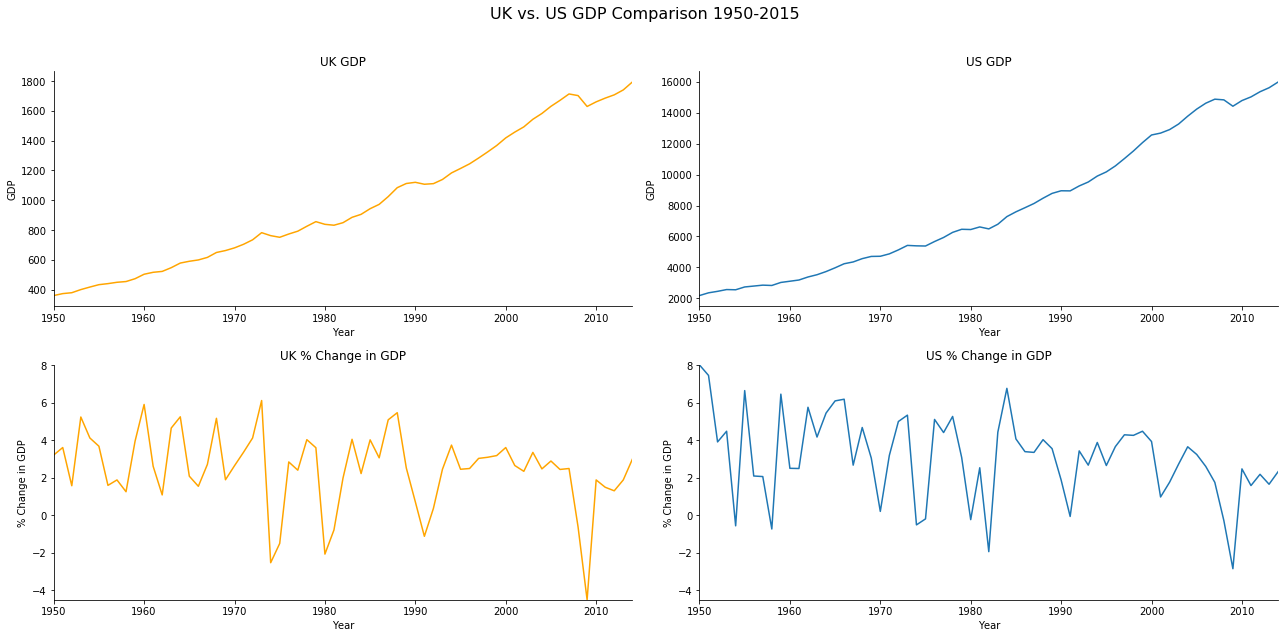

In [7]:
combDF = combinedUKUSData()

ymin=min([min(combDF["UKRelative"]), min(combDF["USRelative"])])
ymax=max([max(combDF["UKRelative"]), max(combDF["USRelative"])])

plt.figure(figsize=(18,9))
plt.suptitle("UK vs. US GDP Comparison 1950-2015",fontsize=16)

plt.subplot(2,2,1)
plt.gca().plot(combDF.index,combDF["UKGDP"], color="orange", label="UK GDP")
plt.xlim(int(combDF.index.values[0]),int(combDF.index.values[len(combDF.index.values)-1]))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title("UK GDP")
plt.xlabel("Year")
plt.ylabel("GDP")


plt.subplot(2,2,2)
plt.gca().plot(combDF.index,combDF["USGDP"], label="US GDP")
plt.xlim(int(combDF.index.values[0]),int(combDF.index.values[len(combDF.index.values)-1]))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title("UK GDP")
plt.title("US GDP")
plt.xlabel("Year")
plt.ylabel("GDP")

plt.subplot(2,2,3)
plt.gca().plot(combDF.index,combDF["UKRelative"], color="orange",label="UK Change in GDP")
plt.xlim(int(combDF.index.values[0]),int(combDF.index.values[len(combDF.index.values)-1]))
plt.ylim(ymin,ymax)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title("UK GDP")
plt.title("UK % Change in GDP")
plt.xlabel("Year")
plt.ylabel("% Change in GDP")

plt.subplot(2,2,4)
plt.gca().plot(combDF.index,combDF["USRelative"], label="US Change in GDP")
plt.xlim(int(combDF.index.values[0]),int(combDF.index.values[len(combDF.index.values)-1]))
plt.ylim(ymin,ymax)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title("UK GDP")
plt.title("US % Change in GDP")
plt.xlabel("Year")
plt.ylabel("% Change in GDP")

plt.tight_layout()
plt.subplots_adjust(top=0.88, hspace=0.25)

plt.show()